<a href="https://colab.research.google.com/github/ricky-kiva/dl-tensorflow-intro/blob/main/2_l1_mnist_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Fashion Model**

In [4]:
# import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel fashion images

Each images is associated with a label in this table:

| Label | Desc |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

MNIST dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API

In [2]:
# load Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
# load training & test split from the dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Label: 9

Image pixel array:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  85 188 146  79   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 140 202 199 255 144   0   0   0   0  11 135 157   5   0]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0   0 200 187 200 191 255  51   0   0  16 208 227 236  63   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2  

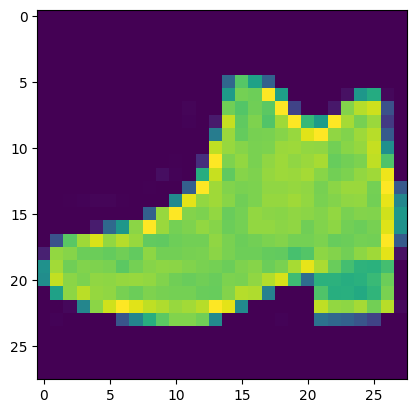

In [10]:
# set image index (between 0 to 59999) from dataset
index = 15

# set number of characters per row when printing
np.set_printoptions(linewidth=116)

# print label & image (as array)
print(f'Label: {training_labels[index]}')
print(f'\nImage pixel array:\n{training_images[index]}')

# visualize the image
plt.imshow(training_images[index])

Normalization: scale the data range of all values in the image array from 0-255 to 0-1

In [11]:
# normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

*   Sequential: defines a sequence of layers in neural network
*   Flatten: turn the 28x28 pixel matrix square and turns it into 1-dimensional array
*   Dense: add hidden layer of neurons (each layer need activation function)
*   ReLU:
```
if x > 0:
  return x
else:
  return 0
```
*   Softmax:  
  *   takes a list of values & scale all of the elements so the sum will be equal to 1
  *   Each scaled values will be the probability of each classes




In [12]:
from keras.backend import softmax
# build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # 10 MNIST fashion class as units
])

In [16]:
# compile model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# train the model
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5040 - accuracy: 0.8232
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3782 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3398 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3143 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2971 - accuracy: 0.8898


We **evaluate** the model to see how well it work with unseen data

In [18]:
# evaluate the model using test set
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3550 - accuracy: 0.8749


[0.35500916838645935, 0.8748999834060669]

# **Notes**

### **Softmax Function** demonstration

In [15]:
# declare sample units & convert to tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# feed inputs to softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# see the sum of all values after softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# get index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


# **Exploration Excersises**

### Exercise 1

Create classifications test images

In [23]:
# predict the prediction probability of the first index
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[4.1228508e-05 1.1956750e-07 1.3394208e-05 8.8772190e-08 2.3697621e-06 8.1451191e-03 8.7768094e-06 9.1603361e-03
 6.5247286e-06 9.8262197e-01]


In [24]:
print(f'predicted value: {np.argmax(classifications[0])}')
print(f'true value: {test_labels[0]}')

predicted value: 9
true value: 9


**Exercise 1 Questions**
1.   What does The list from ```print(classifications[0])``` represent?
  *   It's the probability that this item is each of the 10 classes
2.   How do you know that this list tells you that the item is an ankle boot?
  *   The 10th element on the list is the biggest, and the ankle boot is labelled 9

### Exercise 2

Look at the impact of adding more neuron

In [32]:
# load dataset
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# normalize data
training_images = training_images/255.0
test_images = test_images/255.0

# create model with 1024 neurons in 1 hidden dense layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # try 1024 neurons
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4689 - accuracy: 0.8313
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3582 - accuracy: 0.8680
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3217 - accuracy: 0.8824
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2975 - accuracy: 0.8898
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2788 - accuracy: 0.8955


In [33]:
# evaluate the model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3492 - accuracy: 0.8735


[0.3492107391357422, 0.8734999895095825]

In [34]:
# predict first index data
classification = model.predict(test_images)
print(f'predicted value: {np.argmax(classifications[0])}')
print(f'true value: {test_labels[0]}')

313/313 [==============================] - 1s 3ms/step
predicted value: 9
true value: 9


**Exercise 2 Question**
1.   Increase to 1024 Neurons -- What's the impact?
  *   Training takes longer, but is more accurate

### Exercise 3

What happened if Flatten() layer removed?

In [ ]:
# load dataset
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# normalize data
training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(training_images, training_labels, epochs=5)

# error: `labels.shape` must equal `logits.shape` except for the last dimension

**Exercise 3 Question**
1.   What would happen if you remove the Flatten() layer? Why do you think that's the case?
  *   We will get an error about the shape of the data
  *   Our data is 28x28 images currently. 28 layers of 28 neurons would be infeasible
  *   We need to *flatten* the image into 784x1, for that case

### Exercise 4

What happened if the final (output) layers is different amount than 10?

In [ ]:
# load dataset
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# normalize data
training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(training_images, training_labels, epochs=5)

# Error: Received a label value of 9 which is outside the valid range of [0, 5)

**Exercise 4 Question**
1.   Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10?
  *   Will get an error as soon as it finds an unexpected value
  *   The number of neurons in the last layer should match the number of classes that is being classified



### Exercise 5

What will happen if added another layer between the single Dense layer & the output layer?

In [42]:
# load dataset
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# normalize data
training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4687 - accuracy: 0.8301
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3536 - accuracy: 0.8700
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3177 - accuracy: 0.8825
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2949 - accuracy: 0.8904
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2772 - accuracy: 0.8964


In [43]:
# evaluate the model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3478 - accuracy: 0.8763


[0.34780147671699524, 0.8762999773025513]

**Exercise 5 Question**
1.   Consider the effects of additional layers in the network. What will happen if added another layer between the single Dense layer & the output layer?
  *   There isn't a significant impact, because it's a relatively simple data
  *   For far more complex data (example, colored images), extra layers are often necessary





### Exercise 6

Trying training with different epochs

In [46]:
# load dataset
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# normalize data
training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(training_images, training_labels, epochs=15) # trying 15 epochs
print("\n")

# evaluate the model
model.evaluate(test_images, test_labels)

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4979 - accuracy: 0.8270
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3772 - accuracy: 0.8629
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3367 - accuracy: 0.8769
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3150 - accuracy: 0.8836
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2939 - accuracy: 0.8917
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2808 - accuracy: 0.8950
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2679 - accuracy: 0.8996
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2594 - accuracy: 0.9026
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2473 - accuracy: 0.9068
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

[0.3506084680557251, 0.885200023651123]

In [47]:
# load dataset
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# normalize data
training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(training_images, training_labels, epochs=30) # trying 30 epochs
print("\n")

# evaluate the model
model.evaluate(test_images, test_labels)

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5025 - accuracy: 0.8251
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3773 - accuracy: 0.8629
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3365 - accuracy: 0.8769
Epoch 4/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3127 - accuracy: 0.8852
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2950 - accuracy: 0.8917
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2797 - accuracy: 0.8972
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2681 - accuracy: 0.9007
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2569 - accuracy: 0.9038
Epoch 9/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2466 - accuracy: 0.9080
Epoch 10/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.240

[0.4051021635532379, 0.8842999935150146]

**Exercise 6 Question**
1.   Consider the impact of training for more or less epochs. Why do you think that would be the case
  *   15 epochs: a model with a much better loss than the one with 5
  *   30 epochs:
      *    loss value decrease more slowly, and sometimes increases
      *   *evaluate* didn't improve that much. It even be slightly worse (*loss*)
      *   it's the side effect of *overfitting*









### Exercise 7

What if the data is not *normalized*?

In [48]:
# load dataset
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(training_images, training_labels, epochs=5)
print("\n")

# evaluate the model
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.4930 - accuracy: 0.7025
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6377 - accuracy: 0.7746
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5604 - accuracy: 0.8023
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5251 - accuracy: 0.8154
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5100 - accuracy: 0.8251


313/313 [==============================] - 1s 3ms/step - loss: 0.5790 - accuracy: 0.8188


[0.5790135264396667, 0.8187999725341797]

**Exercise 7 Question**
1.   What would be the impact of removing normalization?
  *   Higher loss, lower accuracy, longer train time






### Exercise 8

Implement callbacks to stop training on certain accuracy

In [49]:
# class extends to tensorflow Keras API (Callback)
class myCallback(tf.keras.callbacks.Callback):
  # overrides `on_epoch_end`
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') >= 0.6):
      print("Reached 60% accuracy. Cancelling the training!")
      self.model.stop_training = True

callbacks = myCallback()

# load dataset
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# normalize data
training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks]) # will stop if reaches 60%

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4738 - accuracy: 0.8306
